In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452589
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027313
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416679
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389572
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813278
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337990


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452589
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999


In [6]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


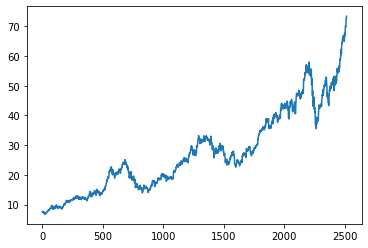

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

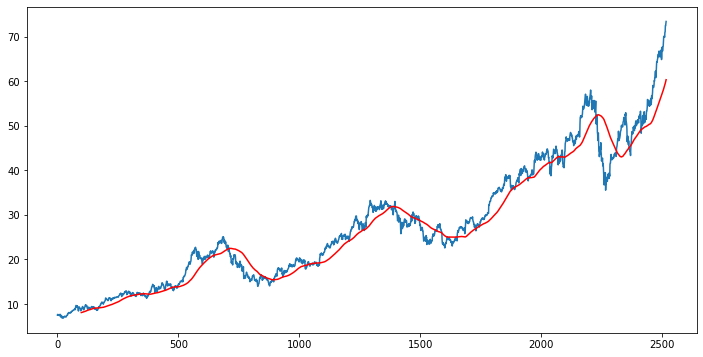

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

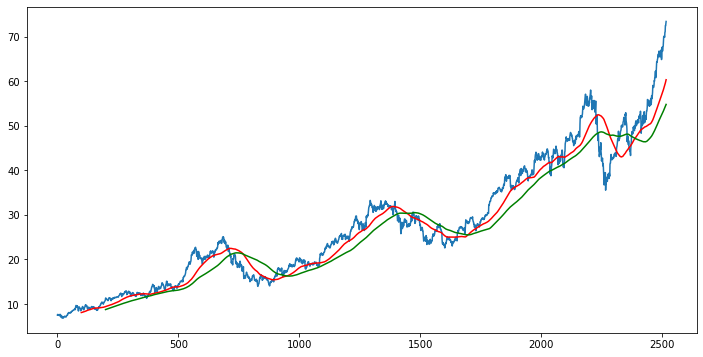

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2517, 5)

In [13]:
df_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
df_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(df_train.shape)
print(df_test.shape)

(1761, 1)
(756, 1)


In [14]:
df_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
df_test.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
df_train_arr = scaler.fit_transform(df_train)
df_train_arr

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
df_train_arr.shape

(1761, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,df_train_arr.shape[0]):
    x_train.append(df_train_arr[i-100:i])
    y_train.append(df_train_arr[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1661, 100, 1)

In [21]:
type(x_train)

numpy.ndarray

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, 
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 31s 428ms/step - loss: 0.0687
Epoch 2/50
52/52 [==============================] - 21s 405ms/step - loss: 0.0158
Epoch 3/50
52/52 [==============================] - 21s 403ms/step - loss: 0.0098
Epoch 4/50
52/52 [==============================] - 21s 404ms/step - loss: 0.0105
Epoch 5/50
52/52 [==============================] - 21s 402ms/step - loss: 0.0090
Epoch 6/50
52/52 [==============================] - 21s 404ms/step - loss: 0.0090
Epoch 7/50
52/52 [==============================] - 21s 405ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 21s 411ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 21s 404ms/step - loss: 0.0073
Epoch 10/50
52/52 [==============================] - 21s 408ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 21s 407ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 21s 407ms/step - loss: 0.0083
Epoch 13/50
5

In [26]:
model.save('KerasModel.h5')

In [27]:
df_test.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [28]:
past_100_days = df_train.tail(100)

In [29]:
final_df = past_100_days.append(df_test,ignore_index=True)

In [30]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [32]:
input_data.shape

(856, 1)

In [33]:
X_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [34]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred.shape

(756, 1)

In [37]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [38]:
y_pred

array([[0.1091013 ],
       [0.1098049 ],
       [0.11049983],
       [0.11115479],
       [0.11174884],
       [0.11226413],
       [0.11269543],
       [0.11305772],
       [0.11338058],
       [0.11369078],
       [0.11401743],
       [0.11437427],
       [0.11476405],
       [0.11519456],
       [0.11566672],
       [0.11617391],
       [0.11670817],
       [0.11725965],
       [0.11781818],
       [0.11839497],
       [0.11899826],
       [0.1196312 ],
       [0.12028727],
       [0.12097371],
       [0.12177341],
       [0.12275405],
       [0.12397379],
       [0.12548214],
       [0.12731528],
       [0.12948418],
       [0.13193813],
       [0.13466391],
       [0.13764551],
       [0.14086889],
       [0.14430895],
       [0.14792952],
       [0.15169509],
       [0.15557311],
       [0.15952218],
       [0.16348974],
       [0.1674215 ],
       [0.17127834],
       [0.17505316],
       [0.17874667],
       [0.18235993],
       [0.18588588],
       [0.1893096 ],
       [0.192

In [39]:
scaler.scale_

array([0.02099517])

In [40]:
scale_factor = 1/0.02099517
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

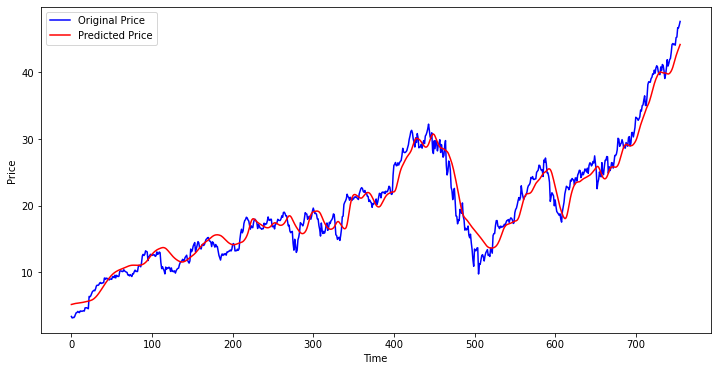

In [41]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()